In [1]:
x_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]

x_test = [[6],[8],[11],[16]]
y_test = [[8],[12],[15],[18]]

## 使用线性回归拟合

In [2]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("The R-squared value of Linear Regressor performing on the training data is ", regressor.score(x_train, y_train))

The R-squared value of Linear Regressor performing on the training data is  0.9100015964240102


In [3]:
import numpy as np
xx = np.linspace(0,26,100)
xx = xx.reshape(xx.shape[0], 1)
yy = regressor.predict(xx)

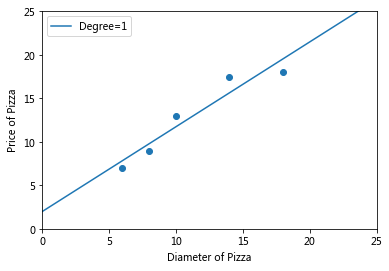

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)

plt1, = plt.plot(xx, yy, label="Degree=1")  # 为了加标注，所以这样写

plt.axis([0,25,0,25])
plt.xlabel("Diameter of Pizza")
plt.ylabel("Price of Pizza")
plt.legend(handles=[plt1])  # legend 加标注
plt.show()

In [6]:
# 在测试集上评估结果
regressor.score(x_test, y_test) # 欠拟合

0.809726797707665

## 使用二次多项式回归模型拟合

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)

In [8]:
regressor_poly2 = LinearRegression()
regressor_poly2.fit(x_train_poly2, y_train)
print("The R-squared value of Polynomial Regressor (Degree=2) performing on the training data is ", regressor_poly2.score(x_train_poly2, y_train))

The R-squared value of Polynomial Regressor (Degree=2) performing on the training data is  0.9816421639597427


In [9]:
xx_poly2 = poly2.transform(xx)
yy_poly2 = regressor_poly2.predict(xx_poly2)

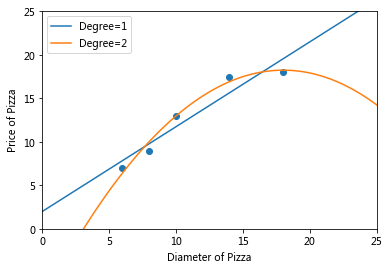

In [10]:
plt.scatter(x_train, y_train)
plt1, = plt.plot(xx, yy, label="Degree=1")
plt2, = plt.plot(xx, yy_poly2, label="Degree=2")

plt.axis([0,25,0,25])
plt.xlabel("Diameter of Pizza")
plt.ylabel("Price of Pizza")
plt.legend(handles=[plt1, plt2])
plt.show()

In [11]:
# 在测试集上评估结果
x_test_poly2 = poly2.transform(x_test)
regressor_poly2.score(x_test_poly2, y_test)

0.8675443656345073

## 使用四次多项式回归模型拟合

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly4 = PolynomialFeatures(degree=4)
x_train_poly4 = poly4.fit_transform(x_train)

In [13]:
regressor_poly4 = LinearRegression()
regressor_poly4.fit(x_train_poly4, y_train)
print("The R-squared value of Polynomial Regressor (Degree=4) performing on the training data is ", regressor_poly4.score(x_train_poly4, y_train))

The R-squared value of Polynomial Regressor (Degree=4) performing on the training data is  1.0


In [14]:
xx_poly4 = poly4.transform(xx)
yy_poly4 = regressor_poly4.predict(xx_poly4)

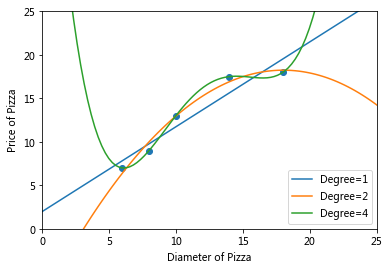

In [15]:
plt.scatter(x_train, y_train)
plt1, = plt.plot(xx, yy, label="Degree=1")
plt2, = plt.plot(xx, yy_poly2, label="Degree=2")
plt4, = plt.plot(xx, yy_poly4, label="Degree=4")

plt.axis([0,25,0,25])
plt.xlabel("Diameter of Pizza")
plt.ylabel("Price of Pizza")
plt.legend(handles=[plt1, plt2, plt4])
plt.show()

In [16]:
# 在测试集上评估结果
x_test_poly4 = poly4.transform(x_test)
regressor_poly4.score(x_test_poly4, y_test) # 过拟合

0.8095880795766907

# L1正则化模型 Lasso
- λ|w|，目标最小化。这种正则化方法的结果，会让参数中的许多元素趋向于0，使得大部分特征失去对优化目标的贡献

In [17]:
from sklearn.linear_model import Lasso
lasso_poly4 = Lasso()
lasso_poly4.fit(x_train_poly4, y_train)
print("lasso score: ", lasso_poly4.score(x_test_poly4, y_test))
print("lasso coef: ", lasso_poly4.coef_)

lasso score:  0.8388926873604351
lasso coef:  [ 0.00000000e+00  0.00000000e+00  1.17900534e-01  5.42646770e-05
 -2.23027128e-04]


/opt/app/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [18]:
print("regressor poly4 score: ", regressor_poly4.score(x_test_poly4, y_test))
print("regressor poly4 coef: ", regressor_poly4.coef_)

regressor poly4 score:  0.8095880795766907
regressor poly4 coef:  [[ 0.00000000e+00 -2.51739583e+01  3.68906250e+00 -2.12760417e-01
   4.29687500e-03]]


# L2正则化模型 Ridge
- λ||w||2，模型参数的平方和最小。这种正则化方法的结果，会让参数向量中的大部分元素都变得很小，压制了参数之间的差异性

In [19]:
from sklearn.linear_model import Ridge
ridge_poly4 = Ridge()
ridge_poly4.fit(x_train_poly4, y_train)
print("ridge poly4 score: ", ridge_poly4.score(x_test_poly4, y_test))
print("ridge poly4 coef: ", ridge_poly4.coef_)
print("ridge poly4 coef sum of squared", np.sum(ridge_poly4.coef_**2))

ridge poly4 score:  0.8374201759366577
ridge poly4 coef:  [[ 0.         -0.00492536  0.12439632 -0.00046471 -0.00021205]]
ridge poly4 coef sum of squared 0.015498965203571016


In [20]:
print("regressor poly4 score: ", regressor_poly4.score(x_test_poly4, y_test))
print("regressor poly4 coef: ", regressor_poly4.coef_)
print("regressor poly4 coef sum of squares: ", np.sum(regressor_poly4.coef_**2))

regressor poly4 score:  0.8095880795766907
regressor poly4 coef:  [[ 0.00000000e+00 -2.51739583e+01  3.68906250e+00 -2.12760417e-01
   4.29687500e-03]]
regressor poly4 coef sum of squares:  647.3826457369564
